<a href="https://colab.research.google.com/github/Gabriel325896/Analisis-Numerico/blob/main/Despacho_Inicial_PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Librerias:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

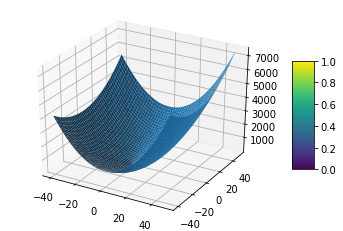

In [21]:
# Grafica
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.linspace(-40,50,1000)
Y = np.linspace(-40,50,1000)
X, Y = np.meshgrid(X, Y) 
Z = 2*X**2 + 2*X + 20 + 0.8*Y**2 + 6*Y + 1 #Función de Costos 
surf = ax.plot_surface(X, Y, Z)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [22]:
# Esta funcion grafica las particulas sobre el plano X,Y
def graph_particles(X,V):
  x, y = np.array(np.meshgrid(np.linspace(-50,50,100), np.linspace(-50,50,100)))
  z = fmin(x, y)
  x_min = x.ravel()[z.argmin()]
  y_min = y.ravel()[z.argmin()]
  plt.figure(figsize=(8,6))
  plt.imshow(z, extent=[-50, 50, -50, 50], origin='lower', cmap='viridis', alpha=0.5)
  plt.colorbar()
  plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
  contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
  plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
  plt.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
  plt.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
  plt.show()

In [23]:
# Funcion objetivo (minimizar)
def fmin(X,Y):
  return (2*X**2 + 2*X + 20) + (0.8*Y**2 + 6*Y + 1)

In [24]:
# Incializar particulas
n_particles = 30
min = -30
max = 30
X = np.random.rand(2, n_particles) * (max - min) + min #Posición aleatoria de Particulas
V = np.random.randn(2, n_particles) * 1.5 #Velocidad aleatoria inicial de Particulas
print(X)

[[ 23.92860563  13.8021285   -4.36106326 -27.4634515    0.53922874
   15.23945043  15.48338166  28.92121125  10.91429069   4.43399355
  -28.35827199  24.74524428  22.69802613  12.04270548  17.45460922
   -6.68802843  15.4137278   22.43912075  13.91306469  -6.80520299
   26.09689618 -29.00913574   8.02668789 -22.6316155    4.75152767
    1.56710944   9.46912532  22.1518012  -23.38484432  10.07947927]
 [ 24.2676215  -27.60097744 -27.21256192  -8.77403447 -16.27118279
  -26.35452107  -7.37850341  25.44814707  -6.59802756  -1.96220657
  -10.65261607 -28.96656315 -23.7046378  -14.30900924  13.92225786
   11.35992155   3.17756827  16.93987253  -8.52970817  25.90753009
   19.31846961  -5.64272537  17.77532837  24.39286103 -23.67574961
  -29.65839303 -15.09843549  14.08901802   9.65107685  21.88757187]]


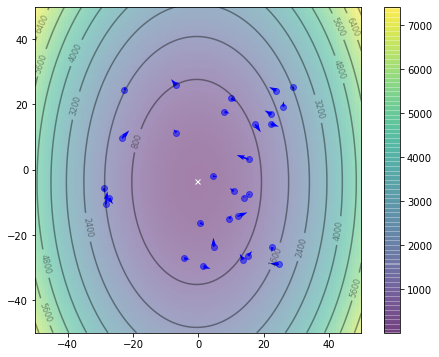

In [25]:
# Grafica de particulas iniciales (X,V)
graph_particles(X,V) 

In [26]:
# Pbest y Gbest -> Inicial:
pbest = X 
f_0 = fmin(X[0], X[1]) 
print(f_0)
min_v = f_0.min() # encontrar el minimo valor
print(min_v)
ind_min = np.where(f_0 == min_v)[0][0]
print(ind_min)
gbest = X[:,ind_min] # coordenada para g best en el plano
print(gbest)


[1830.75323714  873.44705931  479.45906839 1483.49817172  136.83400757
  913.48209782  530.71980785 2422.49077661  276.31107267   60.49554903
 1599.53352363 1792.59476368 1404.09688877  413.08306244  903.83294236
  268.48117503  554.13642676 1404.11318151  442.99935564  792.41644248
 1849.7632053  1637.65756901  525.33062206 1622.48331119  382.03548364
  554.79174634  311.0465097  1290.04264639 1200.3532875   758.92883617]
60.495549028566344
9
[ 4.43399355 -1.96220657]


In [27]:
#Hiperparametros
c1 = c2 = 0.1 
w = 0.8

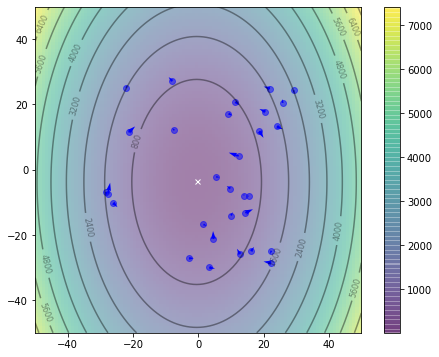

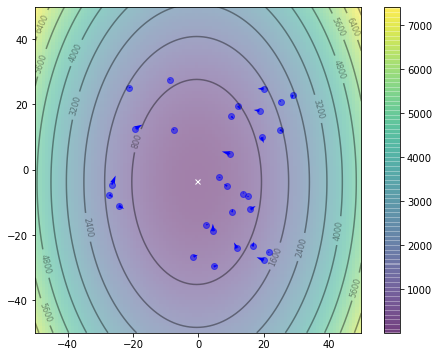

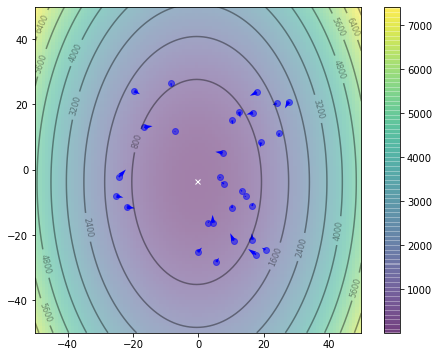

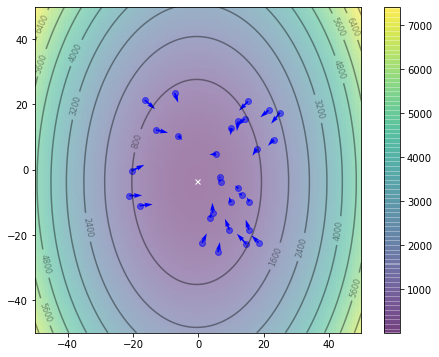

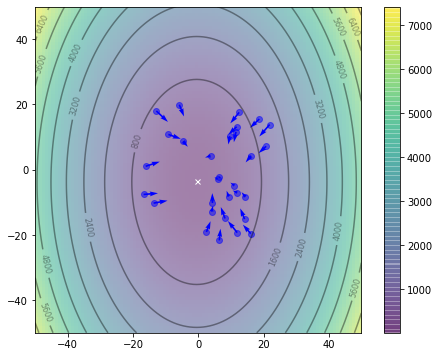

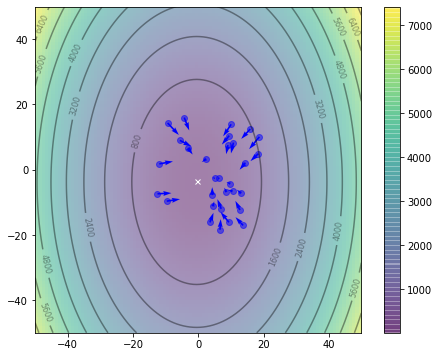

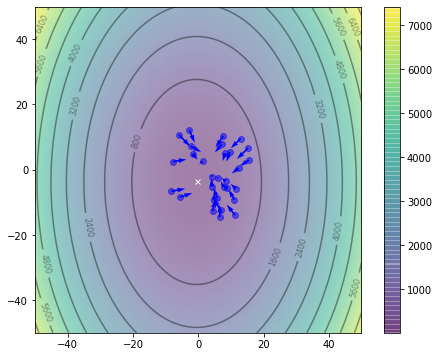

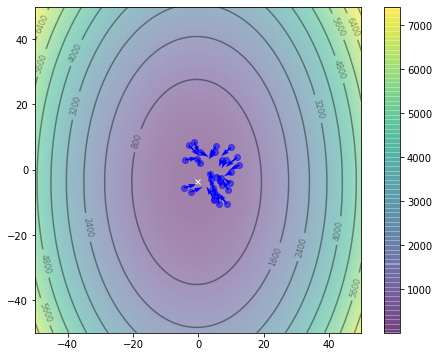

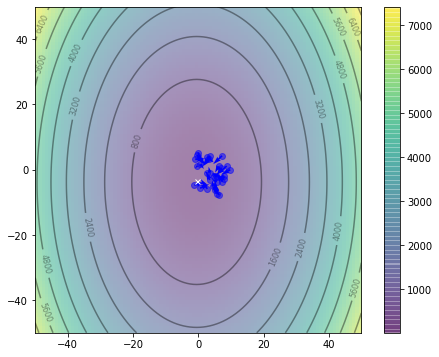

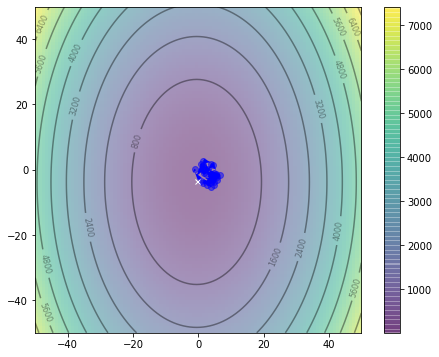

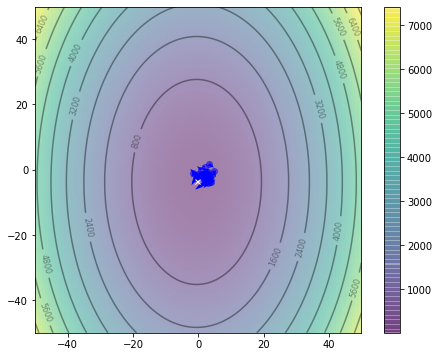

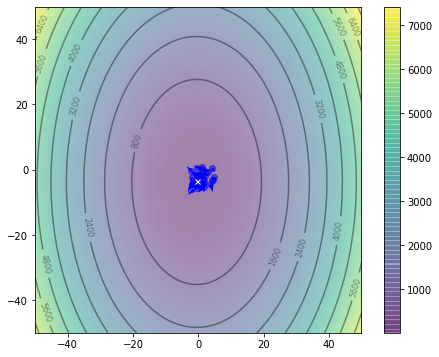

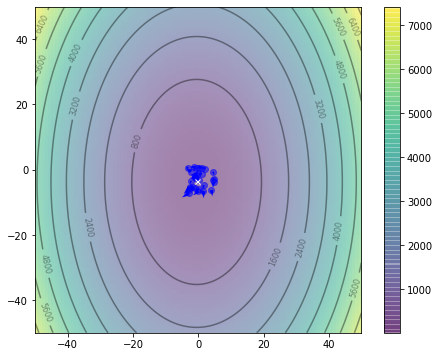

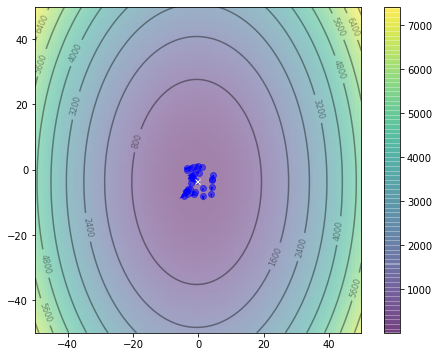

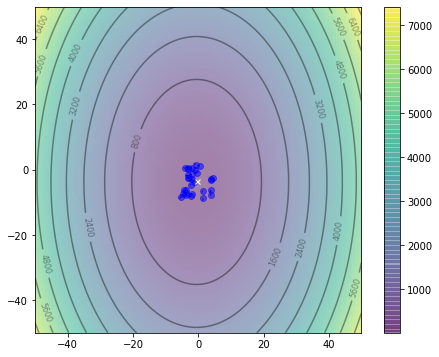

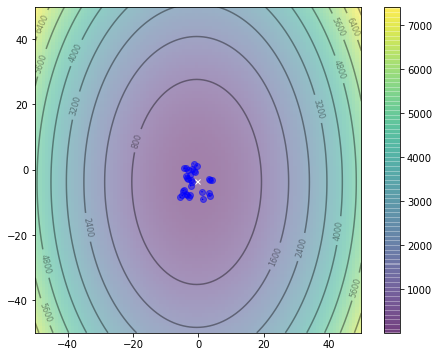

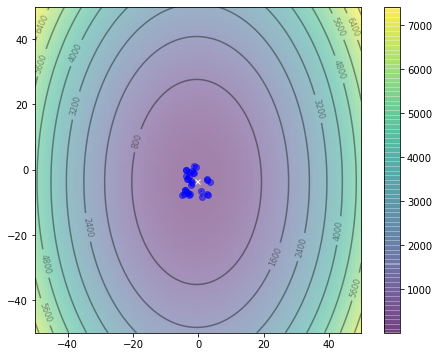

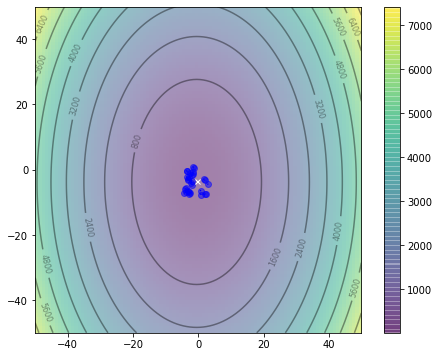

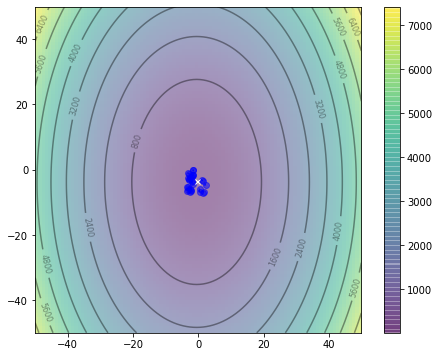

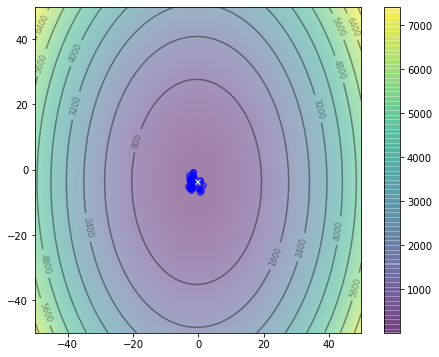

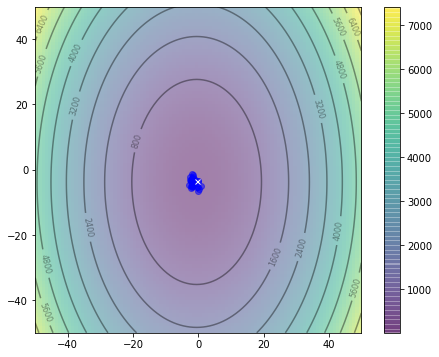

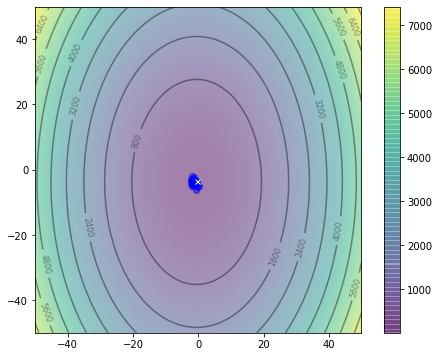

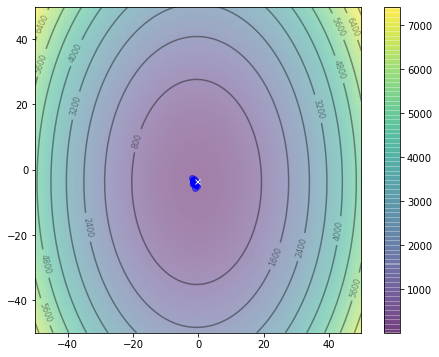

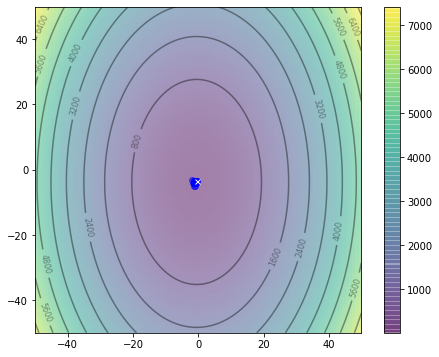

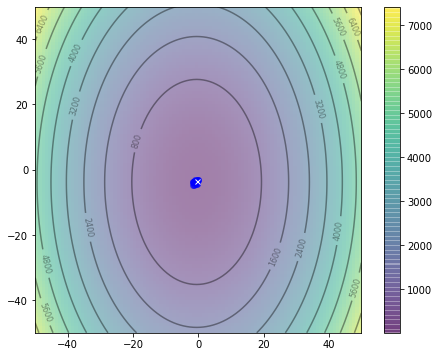

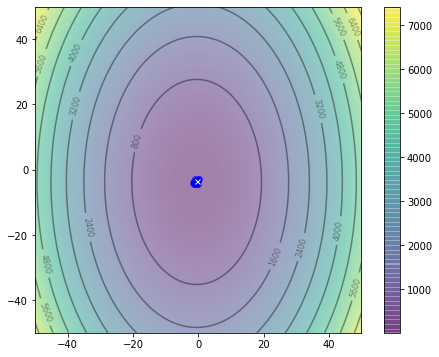

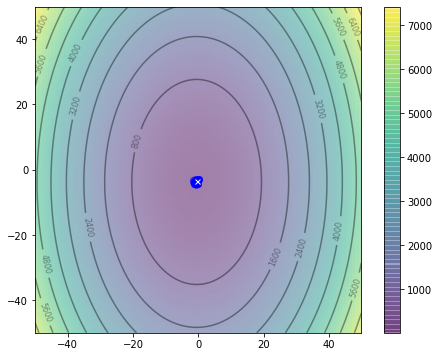

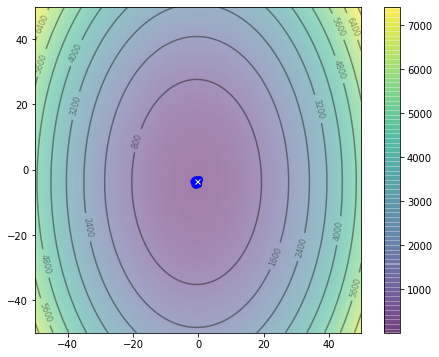

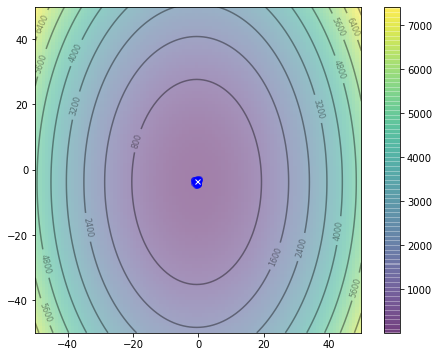

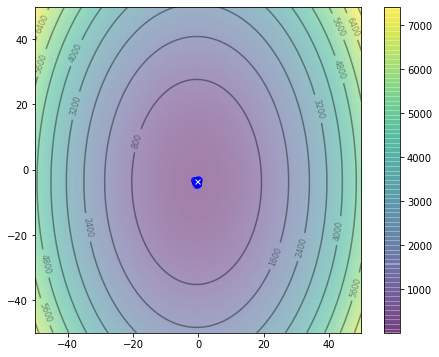

In [28]:
n = 30 # cant. max de iteraciones
j = 0 #contador que inicia en 0
while True:
  r = np.random.rand(2) # [r1 r2] 
  r1 = r[0] ; r2 = r[1] 
  V = w*V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1) - X) #Función de actualización de velocidad de PSO
  X = X + V
  f_k = fmin(X[0], X[1])
  for i in range(0,n_particles):
    if f_k[i] < f_0[i]:
      pbest[:,i] = X[:,i]
  f_gbest = fmin(pbest[0],pbest[1])
  min_v = f_gbest.min() # encontrar el minimo
  ind_min = np.where(f_gbest == min_v)[0][0] # el lugar donde esta el minimo
  gbest = pbest[:,ind_min] # coordenada para g best
  f_0 = f_k 
  j = j + 1
  graph_particles(X,V)
  if j >= n:
    break